In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit import Parameter
from qiskit.circuit.library import EfficientSU2, TwoLocal, ZZFeatureMap
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.result import QuasiDistribution
from qiskit.transpiler.passes import Decompose
from qiskit.quantum_info import Operator

In [3]:
num_assets = 5

# 3 common quantum circuits to use for ansatz with linear entanglement
ZZ_linear = ZZFeatureMap(feature_dimension=num_assets, entanglement='linear', reps=1, insert_barriers=True)
SU2_linear = EfficientSU2(num_assets, entanglement='linear', reps=1, insert_barriers=True)
TwoL_linear = TwoLocal(num_assets, 'ry', 'cx', entanglement='linear', reps=1, insert_barriers=True)

# 3 common quantum circuits to use for ansatz with cyclic entanglement
ZZ_cyclic = ZZFeatureMap(feature_dimension=num_assets, entanglement='circular', reps=1, insert_barriers=True) 
SU2_cyclic = EfficientSU2(num_assets, entanglement='circular', reps=1, insert_barriers=True)
TwoL_cyclic = TwoLocal(num_assets, 'ry', 'cx', entanglement='circular', reps=1, insert_barriers=True)


# 3 common quantum circuits to use for ansatz with full entanglement
ZZ_full = ZZFeatureMap(feature_dimension=num_assets, entanglement='full', reps=1, insert_barriers=True)
SU2_full = EfficientSU2(num_assets, entanglement='full', reps=1, insert_barriers=True)
TwoL_full = TwoLocal(num_assets, 'ry', 'cx', entanglement='full', reps=1, insert_barriers=True)


# master list for ansatz circuits 
ansatz_list = [[ZZ_linear, ZZ_cyclic, ZZ_full],
                [SU2_linear, SU2_cyclic, SU2_full],
                [TwoL_linear, TwoL_cyclic, TwoL_full]]

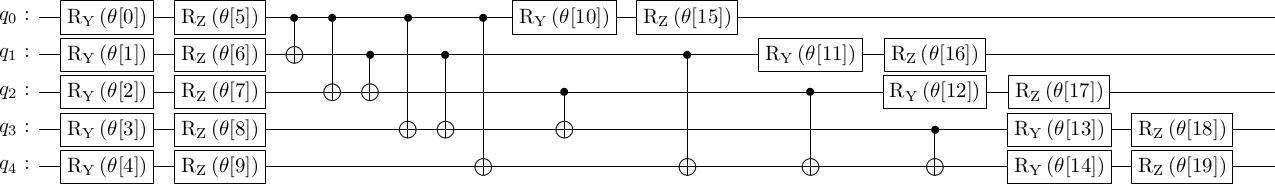

In [14]:
SU2_full.decompose().draw(output="latex", fold=250)

In [5]:
# Create circuit to test transpiler on
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit.circuit.library import EfficientSU2
from qiskit.result import QuasiDistribution

# Use Statevector object to calculate the ideal output
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# These are all for actual quantum computer runs
from qiskit_ibm_runtime import Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.providers.jobstatus import JobStatus 
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit_algorithms import NumPyMinimumEigensolver, SamplingVQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer

import numpy as np
import matplotlib.pyplot as plt
import datetime

/tmp/ipykernel_219/802031178.py:16: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


In [6]:
# set number of assets which is equal to number of qubits
num_assets = 5
seed = 479  # To keep consistently generated data

SU2_full = EfficientSU2(num_assets, entanglement='full', reps=1)
SU2_linear = EfficientSU2(num_assets, entanglement='linear', reps=1)

In [15]:
service = QiskitRuntimeService(channel="ibm_quantum", 
                               token="a6cee0a56416a409ee6af94b1cf3bb957c083d2bfd102c47416849a4455cd711626e8bba737191cf1882848c9ebe6d7e6ba17cda21c913546cec73323f71a95b")
real_device = service.backend('ibm_brisbane')

In [17]:
transpiled_SU2_full = transpile(SU2_full, real_device, optimization_level=1)

In [18]:
transpiled_SU2_full.draw(fold=5000)

ancilla_0 -> 0 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
    ancilla_1 -> 1 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
    ancilla_2 -> 2 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [13]:
print(SU2_full.decompose().depth())
print(transpiled_SU2_full.depth())

11
226
